## Sign-language-digits in Fastai

Target: Create a classifier that can intepret sign language for number 0 to 9.

Source: https://github.com/ardamavi/Sign-Language-Digits-Dataset

In [1]:
from fastai.vision import *

In [2]:
path = 'Sign-Language-Digits-Dataset/Dataset/'

In [3]:
#data without data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         size=100, num_workers=4, bs=64).normalize(imagenet_stats)

In [4]:
# some info about dataset
print(data.classes)
print(data.c)
print(len(data.train_ds))
print(len(data.valid_ds))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10
1650
412


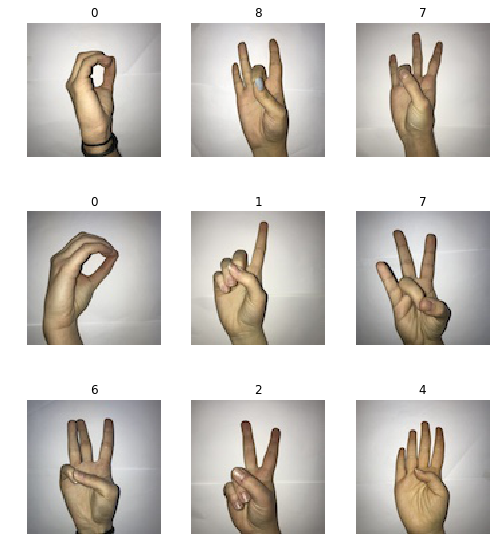

In [5]:
# data sample
data.show_batch(rows=3, figsize=(7,8))

In [6]:
# model: resnet34
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.104595,0.917017,0.720874,00:03
1,1.244999,0.519808,0.842233,00:03
2,0.815438,0.451616,0.849515,00:02
3,0.565945,0.408574,0.871359,00:03
4,0.426296,0.404866,0.871359,00:02


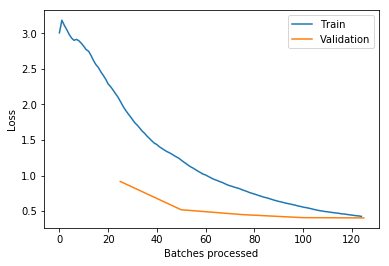

In [8]:
learn.recorder.plot_losses()

In [9]:
# model with data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=100, num_workers=4, bs=64).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet34, metrics=accuracy)

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.065867,1.028384,0.645631,00:04
1,1.378223,0.736856,0.733010,00:04
2,1.032789,0.606340,0.793689,00:04
3,0.840705,0.519130,0.805825,00:04
4,0.713001,0.502360,0.805825,00:04


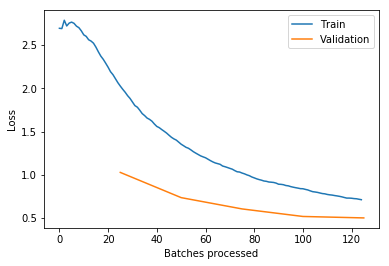

In [10]:
learn.recorder.plot_losses()

In [11]:
# unfreeze pre-trained layers 
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.unfreeze()

In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.671308,0.726514,0.713592,00:04
1,0.849127,0.203759,0.924757,00:03
2,0.498215,0.095506,0.966019,00:04
3,0.307294,0.061506,0.978155,00:04
4,0.198364,0.055017,0.973301,00:04


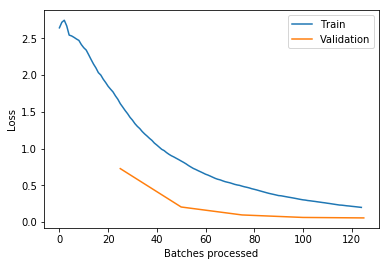

In [13]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


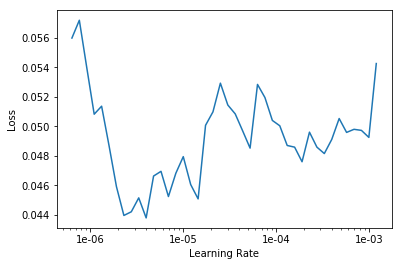

In [14]:
# search the best learning rate
learn.lr_find()
learn.recorder.plot()

In [15]:
# training
learn.fit_one_cycle(5, max_lr=slice(1e-06, 1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.055959,0.052785,0.973301,00:04
1,0.050426,0.052681,0.973301,00:04
2,0.049946,0.050227,0.973301,00:04
3,0.048090,0.049442,0.975728,00:04
4,0.047747,0.048211,0.975728,00:04


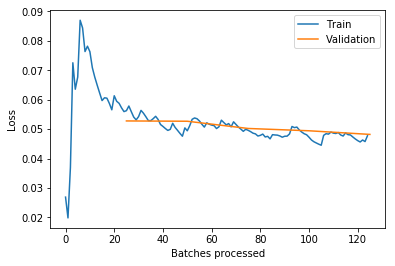

In [16]:
learn.recorder.plot_losses()

In [17]:
# where model make mistake?
from fastai.vision import *

interp = ClassificationInterpretation.from_learner(learn)

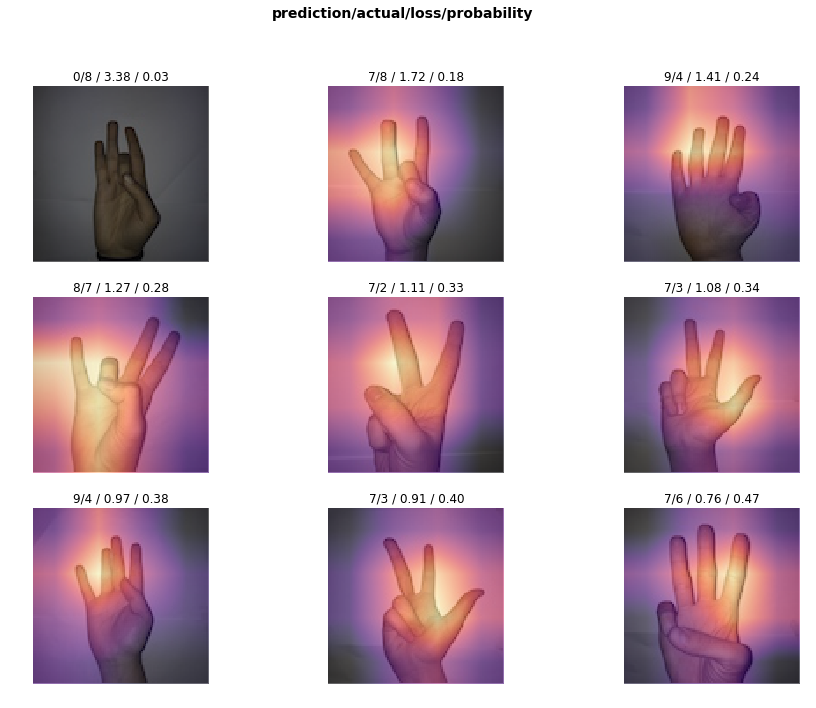

In [18]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))

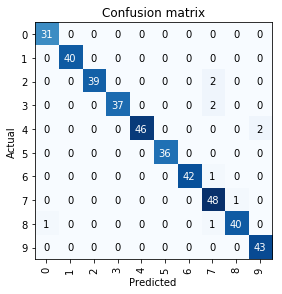

In [19]:
interp.plot_confusion_matrix()

In [20]:
# another model: resnet50 without data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
       size=100, num_workers=4, bs=64).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet50, metrics=accuracy)

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.566693,0.735056,0.747573,00:04
1,0.956984,0.565567,0.791262,00:03
2,0.622154,0.551132,0.788835,00:03
3,0.405347,0.510029,0.827670,00:03
4,0.282886,0.484950,0.844660,00:03


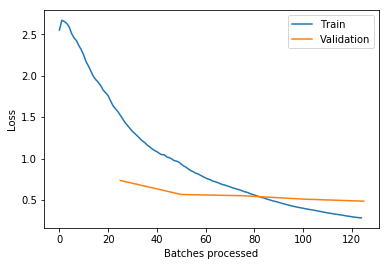

In [21]:
learn.recorder.plot_losses()

In [22]:
# model with data augumentation
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=100, num_workers=4, bs=64).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet34, metrics=accuracy)

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.147933,1.024839,0.650485,00:03
1,1.424891,0.621008,0.783981,00:03
2,1.059266,0.526170,0.825243,00:03
3,0.851910,0.494313,0.834951,00:03
4,0.734923,0.497100,0.822816,00:03


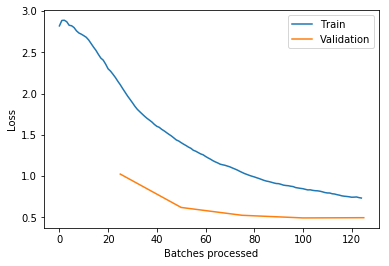

In [23]:
learn.recorder.plot_losses()

In [24]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.unfreeze()

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.533304,0.544716,0.815534,00:04
1,0.777314,0.287578,0.912621,00:04
2,0.444210,0.084719,0.975728,00:04
3,0.269544,0.080936,0.978155,00:04
4,0.168392,0.059969,0.987864,00:04


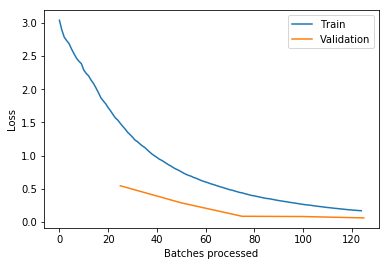

In [25]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


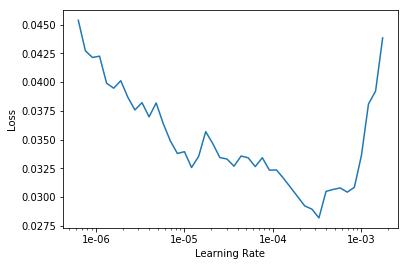

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
# resnet50 with learning rate
learn.fit_one_cycle(5, max_lr=1e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.029489,0.058391,0.985437,00:04
1,0.031658,0.057168,0.985437,00:04
2,0.034999,0.054324,0.987864,00:04
3,0.035634,0.051558,0.990291,00:04
4,0.033525,0.053752,0.987864,00:03


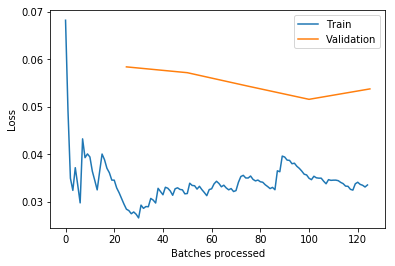

In [28]:
learn.recorder.plot_losses()